In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score

# Data After Sanderd Cleaning

In [2]:
data=pd.read_excel(r"C:\Users\Ahmed\Downloads\EGEC 10-11-2022.xlsx")

## Exploring Data

## Cleaning Data 

In [3]:
data=data.drop([
                'Project Owner',
                'Project Type','Submission Date',
                'Account Manager','Country','Opportunity Manager','Director',
                'Country','EGEC Company'],axis=1)

### pending data deleted (33 record)

In [4]:
dnull=data['Opportunity Status'].value_counts()
dnull

Lost Financial         202
Pending                180
Awarded                105
Canceled by Company     28
Canceled by Client      27
Ongoing                  9
Canceled by Client       9
Name: Opportunity Status, dtype: int64

In [5]:
dd=data.isnull().sum()
dd[dd>0]

Series([], dtype: int64)

In [6]:
df=data.dropna()

### Converting Data Type

In [7]:
df_obj=df.select_dtypes(include='object')
df_non_obj=df.select_dtypes(exclude='object')

In [8]:
la=LabelEncoder()


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560 entries, 0 to 559
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   year                560 non-null    int64         
 1   Opportunity type    560 non-null    object        
 2   Business Line       560 non-null    object        
 3   Client Segment      560 non-null    object        
 4   Service             560 non-null    object        
 5   Project Location    560 non-null    object        
 6   Dead_line           560 non-null    datetime64[ns]
 7   Fees in USD         560 non-null    float64       
 8   Opportunity Status  560 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 43.8+ KB


In [10]:
df.drop(['Dead_line'],inplace=True,axis=1)

In [11]:
df['Opportunity type']=pd.get_dummies(df['Opportunity type'],drop_first=True)
df['Business Line']=pd.get_dummies(df['Business Line'],drop_first=True)
df['Client Segment']=pd.get_dummies(df['Client Segment'],drop_first=True)
df['Service']=pd.get_dummies(df['Service'],drop_first=True)
df['Project Location']=pd.get_dummies(df['Project Location'],drop_first=True)
df['Opportunity Status']=pd.get_dummies(df['Opportunity Status'],drop_first=True)

## Data Analysis

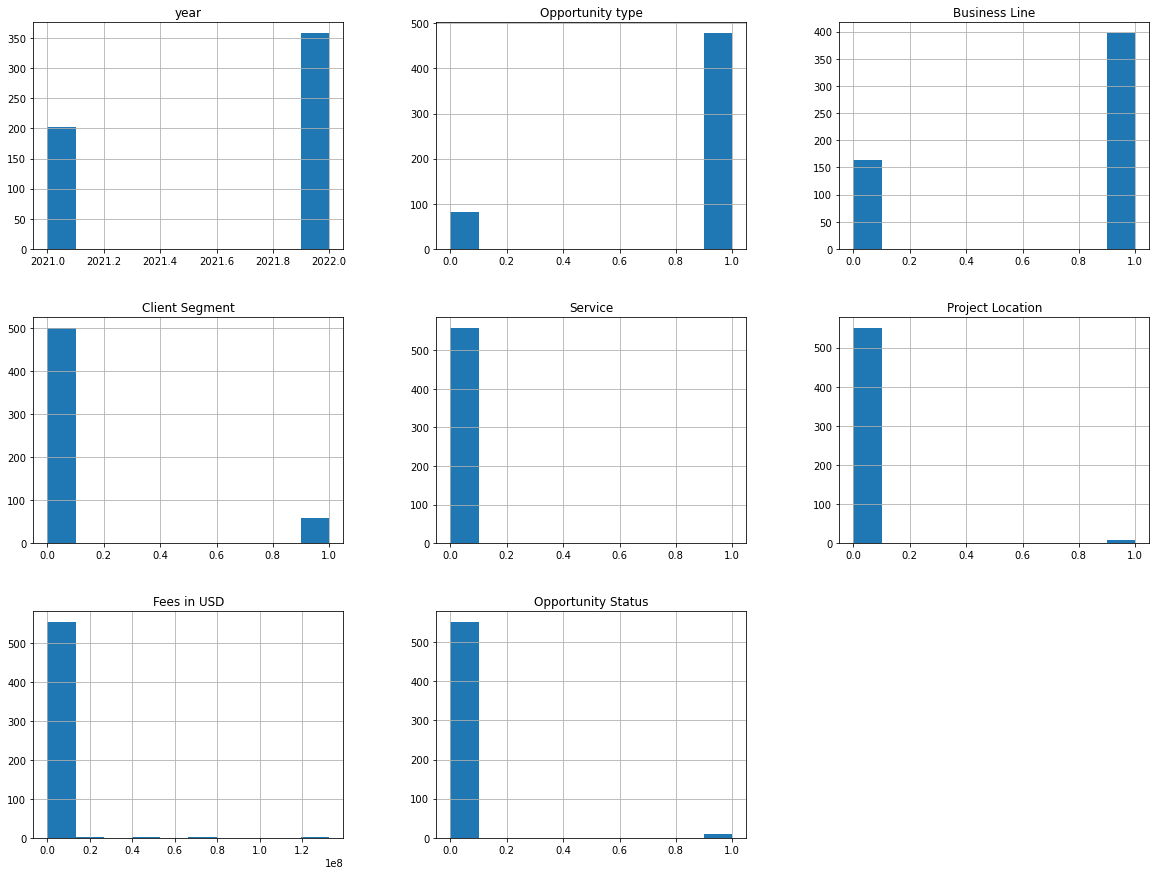

In [12]:
df.hist(figsize=(20,15))
plt.show()

<AxesSubplot:>

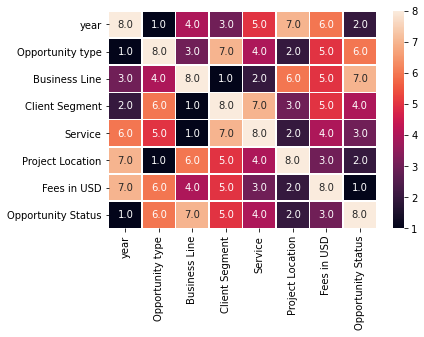

In [13]:
cor=df.corr()
sns.heatmap(cor.rank(axis='columns'),annot=True,fmt=".1f",linewidth=.5)

## Creating ML Model

In [14]:
x=df.drop(['Opportunity Status'],axis=1)
y=df['Opportunity Status']

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=21)

In [26]:
modelx=KNeighborsClassifier()
modelx.fit(x_train,y_train)
prex=modelx.predict(x_test)

In [25]:
import joblib
joblib.dump(modelx,'modelx.pkl')

['modelx.pkl']